# 3.1 퍼셉트론에서 신경망으로

## 3.1.1 신경망의 예
* 입력층 : 가장 왼쪽 줄
* 출력층 : 맨 오른쪽 줄
* 은닉층 : 중간 줄

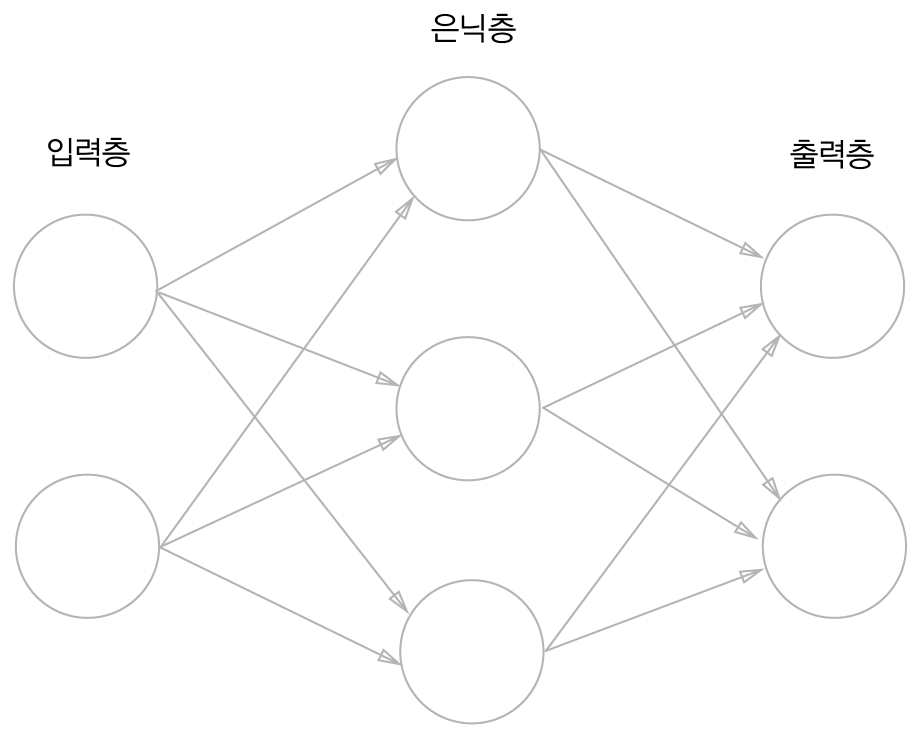

In [2]:
# 신경망의 예
from IPython.display import Image
Image("images/fig 3-1.png")

## 3.1.2 퍼셉트론 복습

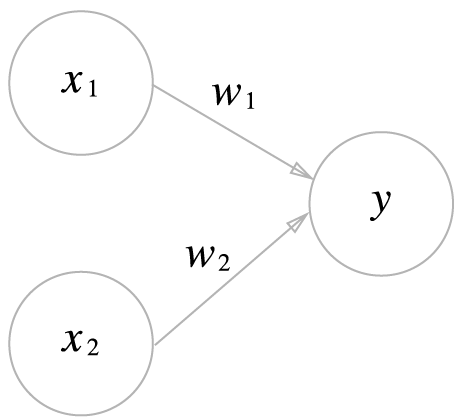

In [3]:
# 퍼셉트론 복습
Image("images/fig 3-2.png")

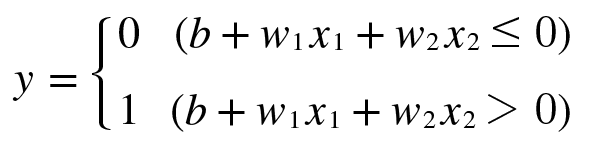

In [4]:
# 퍼셉트론 수식
Image("images/e 3.1.png")

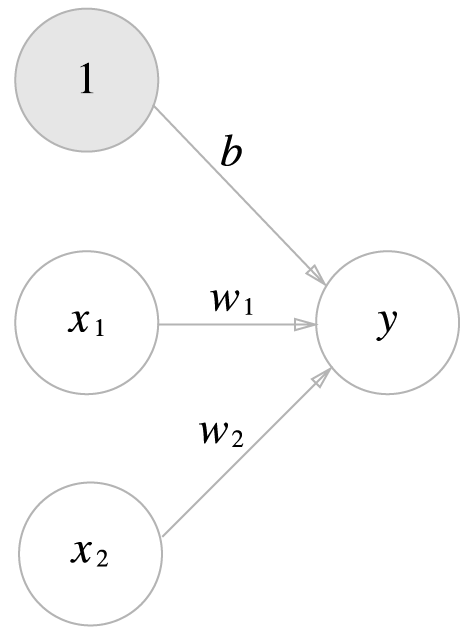

In [5]:
# 편향을 명시한 퍼셉트론 
Image("images/fig 3-3.png")

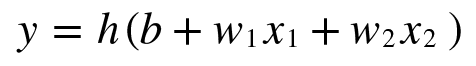

In [6]:
# 퍼셉트론 수식을 하나의 식으로 
Image("images/e 3.2.png")

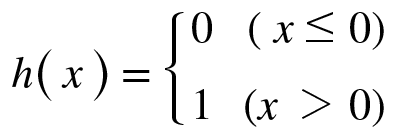

In [7]:
# 퍼셉트론 수식의 h함수 정의(나중에 활성화 함수로 정의)
Image("images/e 3.3.png")

## 3.1.3 활성화 함수의 등장
* 활성화 함수 : 입력 신호의 총합을 출력 신호로 변환하는 함수

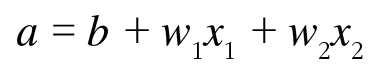

In [8]:
# 두개의 함수로
Image("images/e 3.4.png")

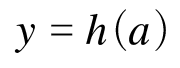

In [9]:
Image("images/e 3.5.png")

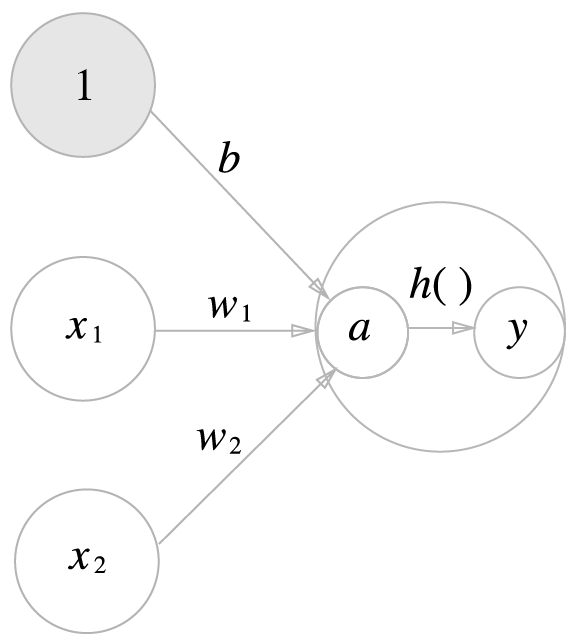

In [10]:
# 활성화 함수의 처리 
Image("images/fig 3-4.png")

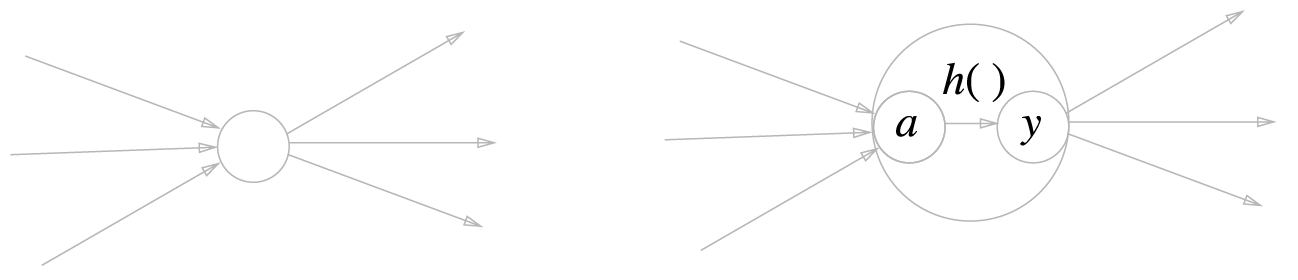

In [11]:
# 일반적인 뉴런과 활성화 처리 과정을 명시한 뉴런
# 활성화 함수가 퍼셉트론에서 신경망으로 가기 위한 길잡이
Image("images/fig 3-5.png")

# 3.2 활성화 함수
* 계단 함수(step function): 임계값을 경계로 출력을 바꾸는 함수
* 퍼셉트론에서는 활성화 함수로 계단 함수 이용
* 활성화 함수를 계단 함수에서 다른 함수로 변경하는 것이 신경망의 세계로 나가는 열쇠

## 3.2.1 시그모이드 함수

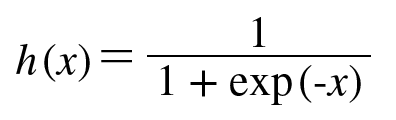

In [13]:
# 시그모이드 함수 
# 퍼셉트론롸 신경망의 주된 차이는 활성화 함수뿐
Image("images/e 3.6.png")

## 3.2.2 계단 함수 구현하기

In [14]:
def step_function(x):
    if x > 0:
        return 1
    else:
        return 0

In [15]:
# 위 함수는 넘파이 배열을 인수로 넣을 수 없어서 재정의
def step_function(x):
    y = x > 0
    return y.astype(np.int)

In [16]:
import numpy as np
x = np.array([-1.0, 1.0, 2.0])
x

array([-1.,  1.,  2.])

In [17]:
y = x > 0
y

array([False,  True,  True])

In [19]:
y = y.astype(int)  # 배열의 자료형 변환
y

array([0, 1, 1])

## 3.2.3 계단 함수의 그래프

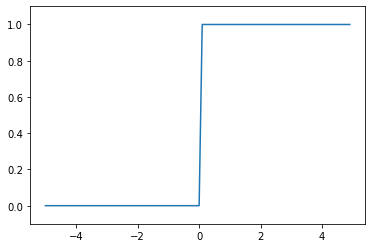

In [21]:
import numpy as np
import matplotlib.pylab as plt

def step_function(x):
    return np.array(x > 0, dtype=int)

x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)
plt.plot(x,y)
plt.ylim(-0.1, 1.1)
plt.show()

## 3.2.4 시그모이드 함수 구현하기

In [22]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [24]:
x = np.array([-1.0, 1.0, 2.0])
sigmoid(x)

array([0.26894142, 0.73105858, 0.88079708])

In [25]:
# 브로드캐스트 기능
t = np.array([1.0, 2.0, 3.0])
1.0 + t

array([2., 3., 4.])

In [26]:
1.0 / t

array([1.        , 0.5       , 0.33333333])

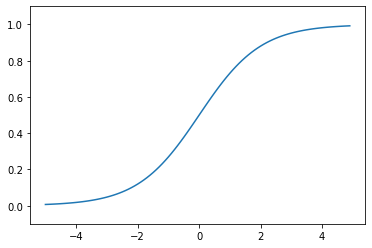

In [27]:
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x,y)
plt.ylim(-0.1, 1.1)
plt.show()

## 3.2.5 시그모이드 함수와 계단 함수 비교

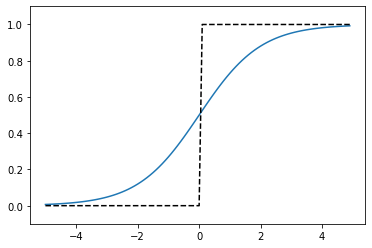

In [10]:
import numpy as np
import matplotlib.pylab as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def step_function(x):
    return np.array(x > 0, dtype=int)

x = np.arange(-5.0, 5.0, 0.1)
y1 = sigmoid(x)
y2 = step_function(x)

plt.plot(x,y1)
plt.plot(x,y2,'k--')
plt.ylim(-0.1, 1.1) # y축 범위 지정
plt.show()

## 3.2.6 비선형 함수
* 신경망에서는 활성화 함수로 비선형 함수 사용

## 3.2.7 ReLU 함수

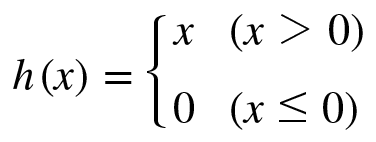

In [30]:
# ReLU 함수 수식
Image("images/e 3.7.png")

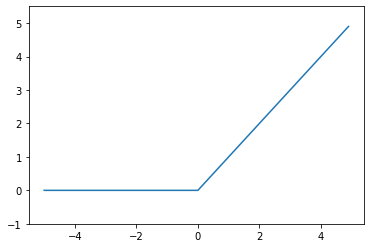

In [31]:
import numpy as np
import matplotlib.pylab as plt

def relu(x):
    return np.maximum(0,x)

x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)
plt.plot(x,y)
plt.ylim(-1.0, 5.5)
plt.show()

# 3.3 다차원 배열의 계산
* 다차원 배열을 사용한 계산법 숙달

## 3.3.1 다차원 배열
* 다차원 배열도 그 기본은 '숫자의 집합'
* 배열의 차원수 : np.ndim()
* 배열의 형상 : shape
* shape : 튜플을 반환 

In [6]:
import numpy as np
A = np.array([1,2,3,4])
print(A)

[1 2 3 4]


In [33]:
np.ndim(A)

1

In [34]:
A.shape

(4,)

In [35]:
A.shape[0]

4

In [36]:
A.shape[1]

IndexError: tuple index out of range

In [37]:
B = np.array([[1,2],[3,4],[5,6]])
print(B)

[[1 2]
 [3 4]
 [5 6]]


In [38]:
np.ndim(B)

2

In [39]:
B.shape

(3, 2)

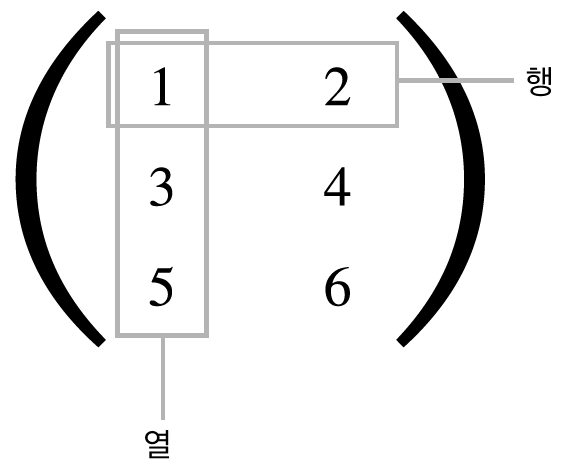

In [40]:
# 2 차원 배열(행렬)의 행(가로)과 열(세로)
# 2 차원 배열은 특히 행렬(matrix)
# 가로 방향 : 행(row)
# 세로 방향 : 열(column)
# 1 차원 배열 : 벡터
# 일반 값은 : 스칼라 
Image("images/fig 3-10.png")

## 3.3.2 행렬의 곱
* 사칙연산( + - * ÷ ) --> 원소별 연산

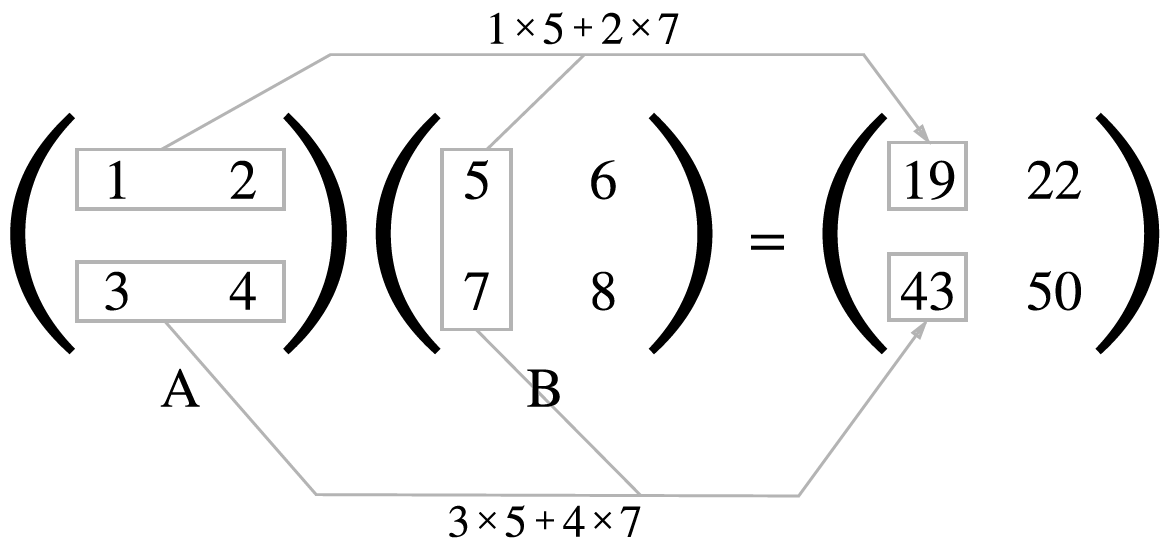

In [41]:
# 행렬의 곱 계산 방법
Image("images/fig 3-11.png")

In [42]:
A = np.array([[1,2],[3,4]])
A.shape

(2, 2)

In [43]:
B = np.array([[5,6],[7,8]])
B.shape

(2, 2)

In [44]:
# 두 행렬의 곱은 넘파이 함수 np.dot()으로 계산
np.dot(A,B)

array([[19, 22],
       [43, 50]])

In [45]:
np.matmul(A,B)

array([[19, 22],
       [43, 50]])

In [46]:
A = np.array([[1,2,3],[4,5,6]])
A.shape

(2, 3)

In [48]:
B = np.array([[1,2],[3,4],[5,6]])
B.shape

(3, 2)

In [49]:
np.dot(A,B)

array([[22, 28],
       [49, 64]])

In [50]:
C = np.array([[1,2],[3,4]])
C.shape

(2, 2)

In [51]:
A.shape

(2, 3)

In [52]:
np.dot(C,A)

array([[ 9, 12, 15],
       [19, 26, 33]])

In [54]:
np.dot(A,C)

ValueError: shapes (2,3) and (2,2) not aligned: 3 (dim 1) != 2 (dim 0)

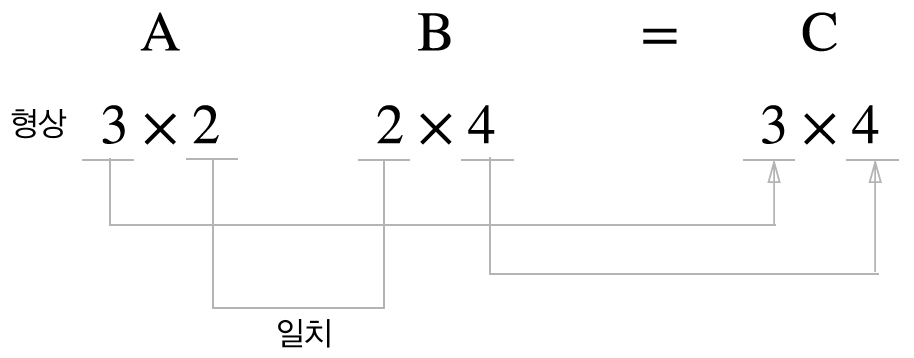

In [55]:
# 행렬의 곱에서는 대응하는 차원의 원소 수를 일치시켜라.
Image("images/fig 3-12.png")

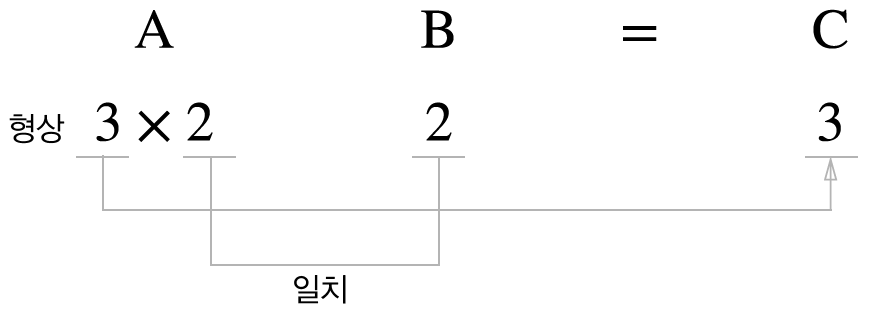

In [61]:
# A가 2차원 행렬, B가 1 차원 배열일 때도 대응하는 차원의 원소를 일치시켜라.
Image("images/fig 3-13.png")

In [56]:
A = np.array([[1,2],[3,4],[5,6]])
A.shape

(3, 2)

In [57]:
B = np.array([7,8])
B.shape

(2,)

In [59]:
np.dot(A,B)

array([23, 53, 83])

In [60]:
np.dot(B,A)

ValueError: shapes (2,) and (3,2) not aligned: 2 (dim 0) != 3 (dim 0)

## 3.3.3 신경망에서의 행렬 곱

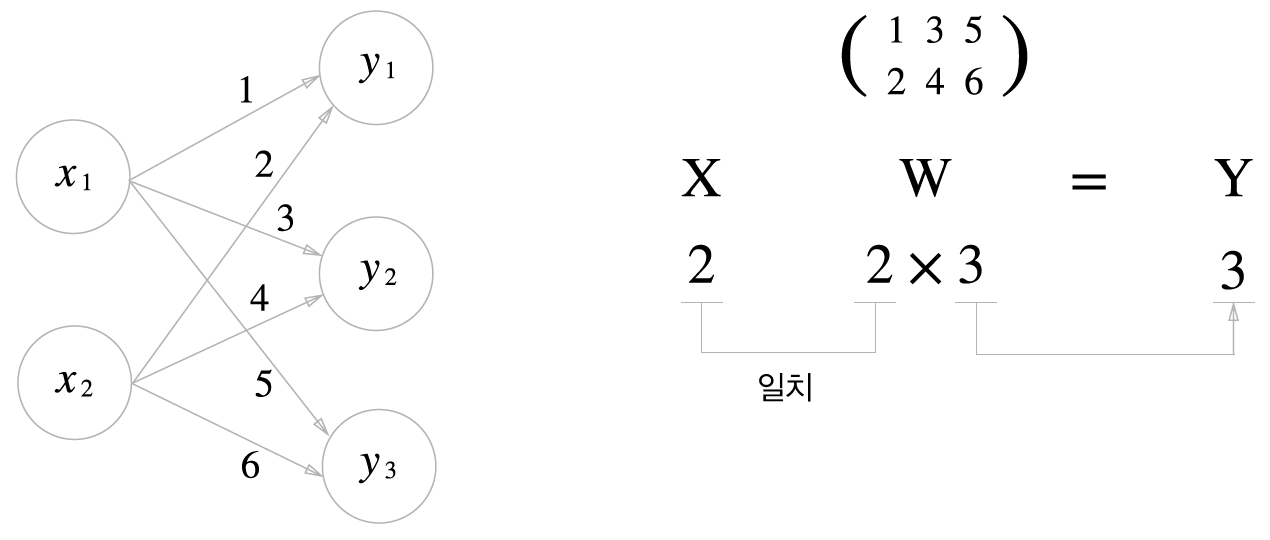

In [62]:
# 행렬의 곱으로 신경망의 계산
Image("images/fig 3-14.png")

In [63]:
X = np.array([1,2])
X.shape

(2,)

In [64]:
W = np.array([[1,3,5],[2,4,6]])
print(W)

[[1 3 5]
 [2 4 6]]


In [69]:
W.shape

(2, 3)

In [70]:
np.transpose(W).shape

(3, 2)

In [71]:
Y = np.dot(X,W)
print(Y)

[ 5 11 17]


In [72]:
Z = np.array([1,2,3])
Z.shape

(3,)

In [74]:
np.dot(W,Z).shape

(2,)

# 3.4 3층 신경망 구현하기

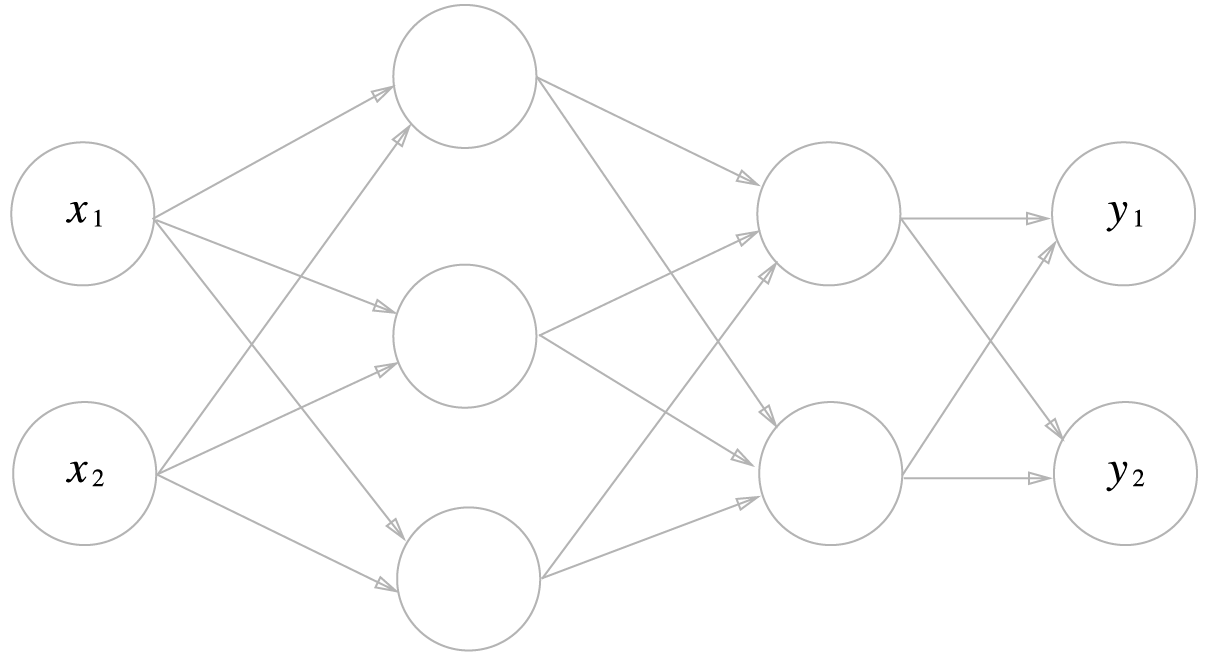

In [75]:
# 3층 신경망
Image("images/fig 3-15.png")

## 3.4.1 표기법 설명

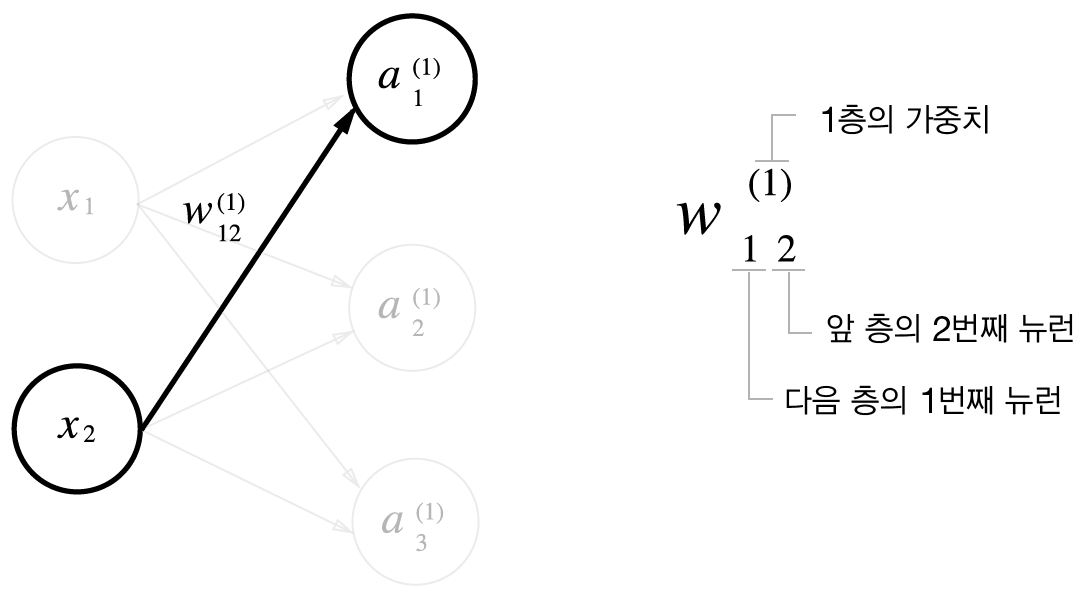

In [76]:
Image("images/fig 3-16.png")

## 3.4.2 각 층의 신호 전달 구현하기

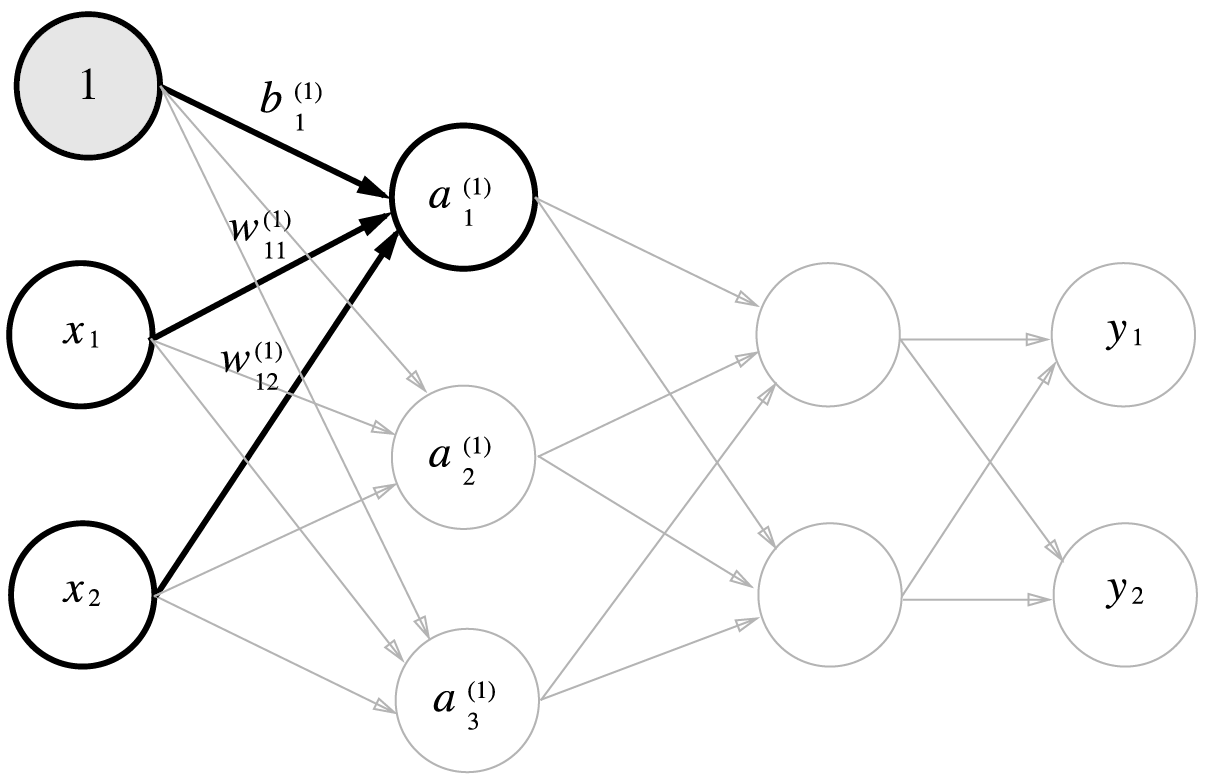

In [77]:
Image("images/fig 3-17.png")

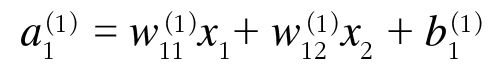

In [2]:
# 위 신경망중 a1 뉴런을 수식으로 표현 해보자.
Image("images/e 3.8.png")

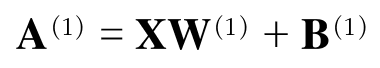

In [3]:
# 위 시기을 행렬의 곱을 이용하여 '가중치 부분'을 간소화 
Image("images/e 3.9.png")

In [4]:
# 책 p 85 W(1)  그림 참조

In [9]:
#넘파이 다차원 배열을 사용해서 [식 3.9]를 구현합시다.(입력 신호, 가중치, 편향은 적당한 값으로 설정)
# 입력층에서 1층으로 신호 전달 식
X = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])

print(W1.shape)  # (2,3)
print(X.shape)
print(B1.shape)

A1 = np.dot(X, W1) + B1

(2, 3)
(2,)
(3,)


In [ ]:

Z1 = sigmoid(A1)   # 아래 그림에서 h() ==> sigmoid()함수에 해당 
print(A1)
print(Z1)

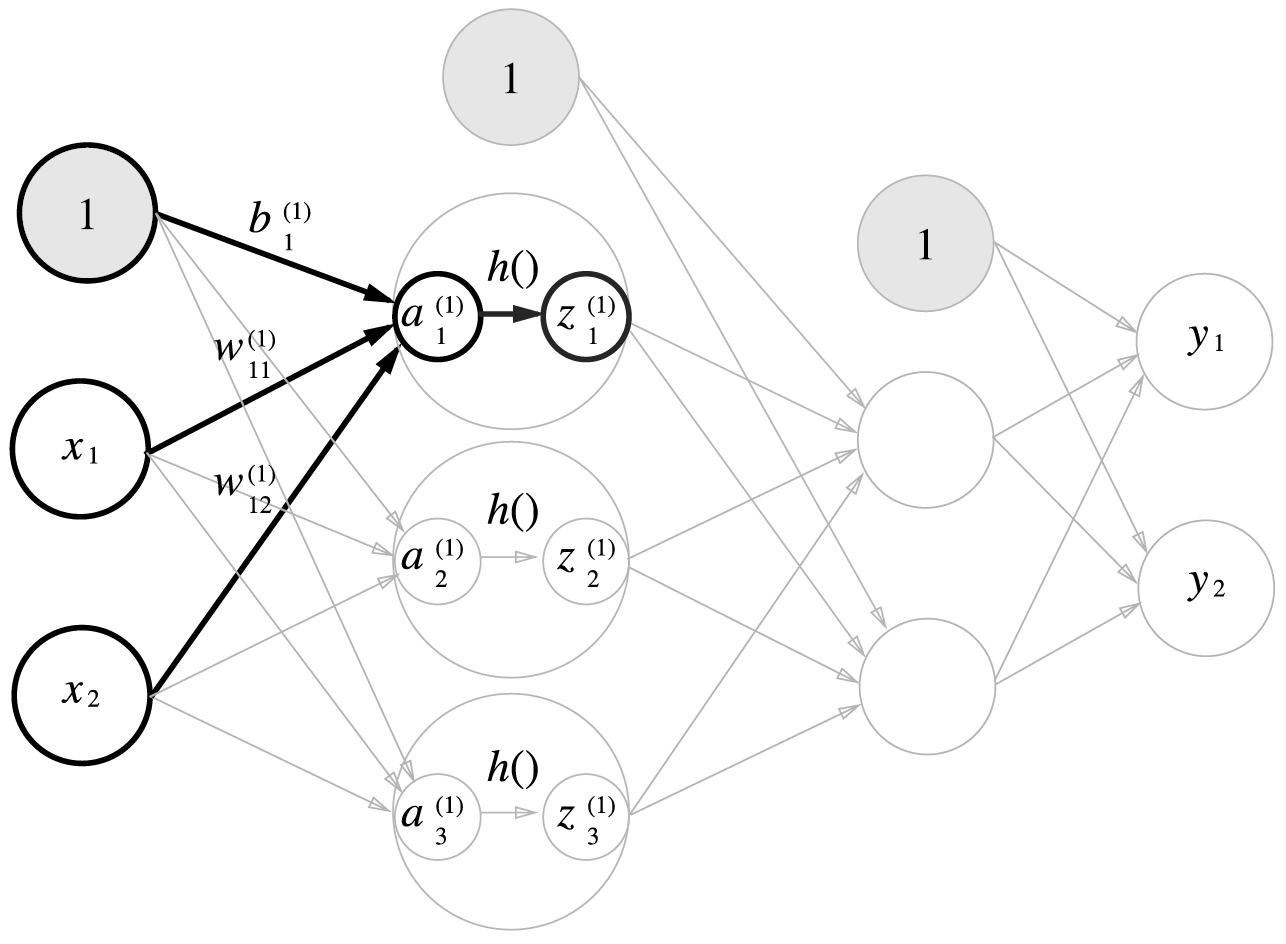

In [10]:
# 위 계산을 그림으로 표현 
Image("images/fig 3-18.png")

In [15]:
# 1층에서 2층으로 신호 전달 식
W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
B2 = np.array([0.1, 0.2])

print(Z1.shape)
print(W2.shape)
print(B2.shape)

A2 = np.dot(Z1, W2) + B2
Z2 = sigmoid(A2)

(3,)
(3, 2)
(2,)


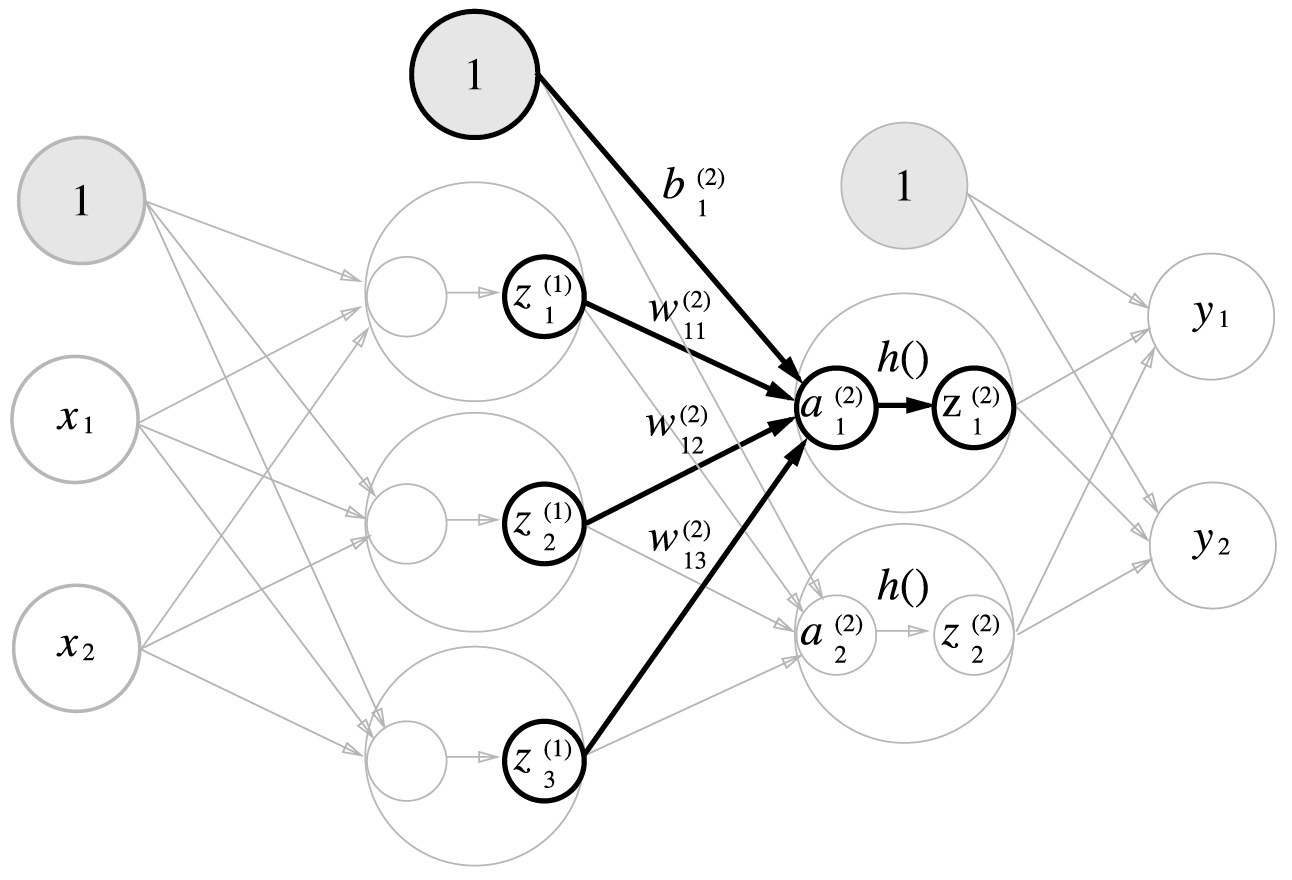

In [16]:
#위 식을 그림으로 표현
Image("images/fig 3-19.png")

In [17]:
# 2층에서 출력층으로의 신호전달 식
# 전체적인 흐름을 통일하기 위해서 
# 여기서는 활성화 함수를 항등 함수을 사용

def identity_function(x):
    return x

W3 = np.array([[0.1, 0.3], [0.2, 0.4]])
B3 = np.array([0.1, 0.2])

A3 = np.dot(Z2, W3) + B3
Y = identity_function(A3) # 혹은  Y = A3

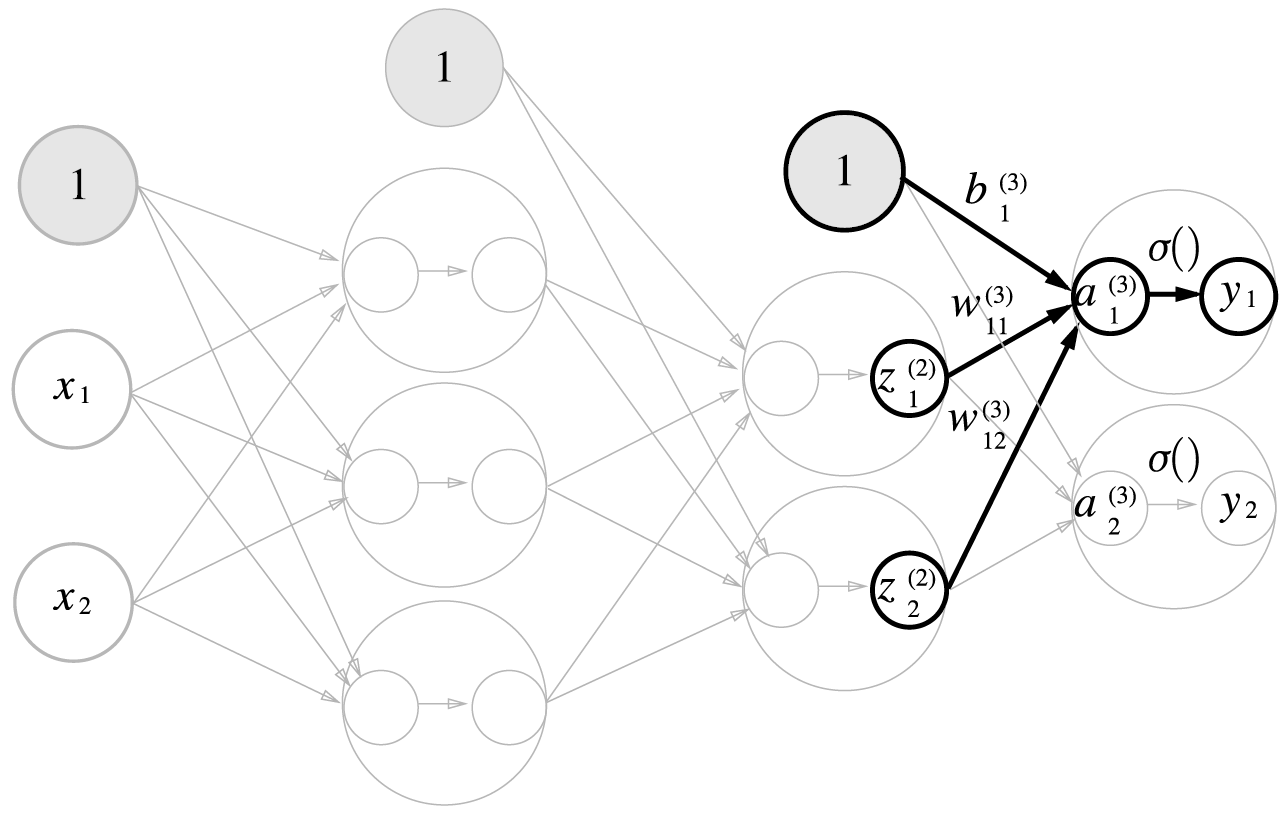

In [18]:
#위 식을 그림으로 표현\
Image("images/fig 3-20.png")

## 3.4.3 구현 정리

In [25]:
# 가중치 W1 대문자 사용
# 편향과 중간 결과는 소문자 사용
def init_network():
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])
    
    return network

def forward(network, x):
    W1, W2, W3 = (network['W1'], network['W2'], network['W3'])
    b1, b2, b3 = network['b1'],network['b2'], network['b3']
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1,W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y  = identity_function(a3)
    
    return y

In [26]:
network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
print(y)

[0.31682708 0.69627909]


# 3.5 출력층 설계하기
* 신경망은 분류와 회귀 모두에 이용가능
* 둘 중 어떤 문제냐에 따라 출력층의 활성화 함수 선택
* 회귀(입력 데이터가 연속적인 수치 예측 문제) : 항등 함수
* 분류(입력 데이터의 종류 분류) : 소프트 맥스 함수

## 3.5.1 항등 함수와 소프트맥스 함수 구현하기

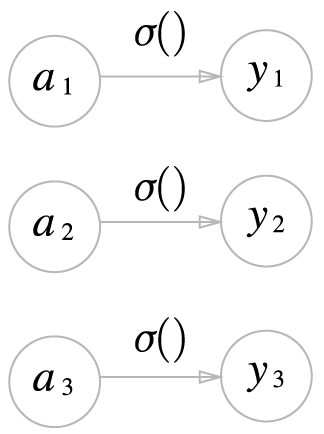

In [27]:
# 항등 함수는 입력을 그대로 출력(입력과 출력이 항상 같다는 뜻)
# 항등 함수 
Image("images/fig 3-21.png")

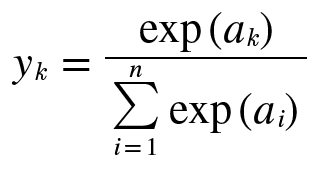

In [29]:
# 분류는 소프트맥스 함수(softmax function)의 수식
Image("images/e 3.10.png")

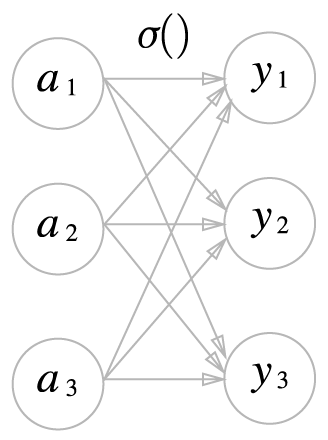

In [30]:
# 소프트 맥스 함수를 활성화 함수로 적용한 뉴런 그림
Image("images/fig 3-22.png")

In [31]:
a = np.array([0.3, 2.9, 4.0])

In [32]:
exp_a = np.exp(a)

In [33]:
print(exp_a)

[ 1.34985881 18.17414537 54.59815003]


In [34]:
sum_exp_a = np.sum(exp_a)
print(sum_exp_a)

74.1221542101633


In [35]:
y = exp_a / sum_exp_a
print(y)

[0.01821127 0.24519181 0.73659691]


In [12]:
def softmax(a):
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return y

## 3.5.2 소프트맥스 함수 구현시 주의점
* 오버플로 문제(컴퓨터의 메모리는 유한)
* 표현할 수 있는 수의 범위가 한정됨( 너무 큰수는 표현 할 수 없음)

In [39]:
a = np.array([1010, 1000, 990])
np.exp(a)/ np.sum(np.exp(a))

<ipython-input-39-53364421a78a>:2: RuntimeWarning: overflow encountered in exp
  np.exp(a)/ np.sum(np.exp(a))
<ipython-input-39-53364421a78a>:2: RuntimeWarning: invalid value encountered in true_divide
  np.exp(a)/ np.sum(np.exp(a))


array([nan, nan, nan])

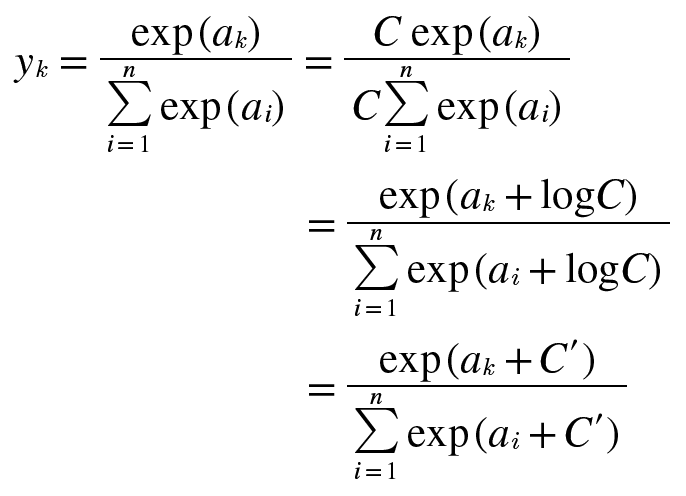

In [40]:
# 문제 해결하기 위해 소프트맥수 함수 구현을 개선 
Image("images/e 3.11.png")

In [42]:
c = np.max(a)
a - c

array([  0, -10, -20])

In [43]:
np.exp(a -c) /np.sum(np.exp(a-c))

array([9.99954600e-01, 4.53978686e-05, 2.06106005e-09])

In [15]:
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    
    return y

## 3.5.3 소프트맥스 함수의 특징
* 출력값의 합 : 1
* %(백분률)로 표현
* 소프트맥스 함수의 출력을 확률로 해석 

In [45]:
a = np.array([0.3, 2.9, 4.0])
y = softmax(a)
print(y)

[0.01821127 0.24519181 0.73659691]


In [46]:
np.sum(y)

1.0

## 3.5.4 출력층의 뉴런 수 정하기
* 출력층의 뉴런수는 풀려는 문제에 맞게 적절히 정해야 함
* 분류에서는 분류하고 싶은 클래스 수로 설정하는 것이 일반적

In [47]:
# 0 ~ 9중 하나로 분류하는 문제의 출력층의 뉴런을 10개로 설정한 그림
# 책 p. 96 그림 3-23 참고

# 3.6 손글씨 숫자 인식
* 추론 과정 : 신경망의 순전파(forward propagation)
* 훈련 데이터(학습 데이터)로 가중치 매개변수 학습 하고,
* 추론 단계에서 학습한 매개변수를 사용하여 입력 데이터 분류

## 3.6.1 MNIST 데이터셋

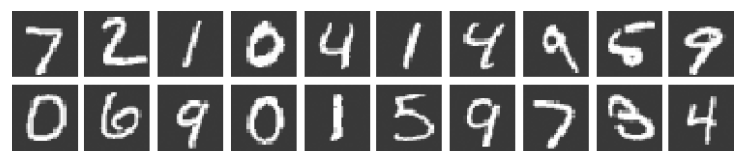

In [3]:
Image("images/fig 3-24.png")

In [1]:
import sys, os
sys.path.append(os.pardir)
from dataset.mnist import load_mnist

(x_train, t_train),(x_test, t_test) = load_mnist(flatten=True, normalize=False)

print(x_train.shape)
print(t_train.shape)
print(x_test.shape)
print(t_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [2]:
import sys, os
sys.path.append(os.pardir)


In [3]:
print(sys.path)

['C:\\aaa\\ch03', 'C:\\Users\\woongkeun\\anaconda3\\python38.zip', 'C:\\Users\\woongkeun\\anaconda3\\DLLs', 'C:\\Users\\woongkeun\\anaconda3\\lib', 'C:\\Users\\woongkeun\\anaconda3', '', 'C:\\Users\\woongkeun\\anaconda3\\lib\\site-packages', 'C:\\Users\\woongkeun\\anaconda3\\lib\\site-packages\\locket-0.2.1-py3.8.egg', 'C:\\Users\\woongkeun\\anaconda3\\lib\\site-packages\\win32', 'C:\\Users\\woongkeun\\anaconda3\\lib\\site-packages\\win32\\lib', 'C:\\Users\\woongkeun\\anaconda3\\lib\\site-packages\\Pythonwin', 'C:\\Users\\woongkeun\\anaconda3\\lib\\site-packages\\IPython\\extensions', 'C:\\Users\\woongkeun\\.ipython', '..', '..']


In [6]:
import numpy as np
from dataset.mnist import load_mnist
from PIL import Image

def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    pil_img.show()
    
(x_train, t_train),(x_test, t_test) = load_mnist(flatten=True, normalize=False)

img = x_train[0]
print("img.shape: ",end=' ')
print(img.shape)

label = t_train[0]
print(label)

print(img.shape)
img = img.reshape(28,28)
print(img.shape)
img_show(img)

img.shape:  (784,)
5
(784,)
(28, 28)


## 3.6.3 신경망의 추론 처리
* MNIST 데이터셋을 가지고 추론을 수행하는 신경망 구현
* 입력층 뉴런 784개 : 이미지 크기(28 x 28 = 784)
* 출력층 뉴런 10개로 구성 : ( 0 ~ 9 숫자를 구분하는 문제)
* 은닉층은 총 두개
* 첫 번째는 50개 뉴런
* 두 번째는 100개 뉴런으로 구성 
* 위 순서대로 작업을 처리해 줄 세 함수 정의
* get_data()
* init_network()
* predict()

In [7]:
import sys, os
sys.path.append(os.pardir)  # 부모 디렉토리의 파일을 가져올 수 있도록 설정
import numpy as np
import pickle

In [8]:
def get_data():
    # normalize=True로 설정하면 0 ~ 255 범위인 각 픽셀의 값을 0.0 ~ 1.0 범위로 변환
    # 이처럼 데이터를 특정 범위로 변환하는 처리를 정규화(normalization)
    # 신경망의 입력 데이터에 특정 변환을 가하는 것을 전처리(pre-processing)라 한다.
    # 전처리 작업으로 정규화 수행한 셈 
    (x_train, t_train), (x_test, t_test) =  \
             load_mnist(normalize=True, flatten=True, one_hot_label=False)
    return x_test, t_test

def init_network():
    # sample_weight.pkl(학습된 가중치 매개변수)을 읽어서 network에 저장하여 리턴
    # 이 파일에는 가중치와 편향 매개변수가 딕셔너리 변수로 저장되어 있음
    with open("sample_weight.pkl", 'rb') as f:    
        network = pickle.load(f)       
        
    return network

def predict(network, x):
    W1, W2, W3 = network['W1'],network['W2'],network['W3']
    b1, b2, b3 = network['b1'],network['b2'],network['b3']
    
    a1 = np.dot(x,W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1,W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2,W3) + b3
    y = softmax(a3)
    
    return y

In [14]:
import time
x, t = get_data()
network = init_network()

accuracy_cnt = 0
start_time = time.time()
for i in range(len(x)):
    y = predict(network, x[i])
    p = np.argmax(y)  # 확률이 가장 높은 원소의 인덱스를 얻는다.
    if p == t[i]:
        accuracy_cnt += 1
end_time = time.time()        
print("Accuracy: " + str(float(accuracy_cnt) / len(x)))
print("execution time: {} sec ".format(end_time - start_time))

Accuracy: 0.9352
execution time: 1.197646141052246 sec 


* 현업에서도 신경망(딥러닝)에 전처리를 활발히 사용
* 전처리를 통해 식별 능력을 개선하고 학습 속도를 높이는 등의 사례가 많이 제시됨
* 데이터 전체 평균과 표준편차를 이용하여 데이터들이 0을 중심으로 분포하도록 이동하거나
* 데이터의 확산 범위를 제한하는 정규화를 수행
* 전체 데이터를 균일하게 분포시키는 데이터 백색화(whiteing)등도 있다.

## 3.6.3 배치 처리
* 입력 데이터와 가중치 매개변수의 형상 주의해 다시 구현 해보기

In [18]:
# 앞서 구현한 신경망 각 층의 가중치 형상을 출력해보기
x, _ = get_data()
network = init_network()
W1,W2,W3 = network['W1'],network['W2'],network['W3']
x.shape

(10000, 784)

In [19]:
x[0].shape

(784,)

In [20]:
W1.shape

(784, 50)

In [21]:
W2.shape

(50, 100)

In [22]:
W3.shape

(100, 10)

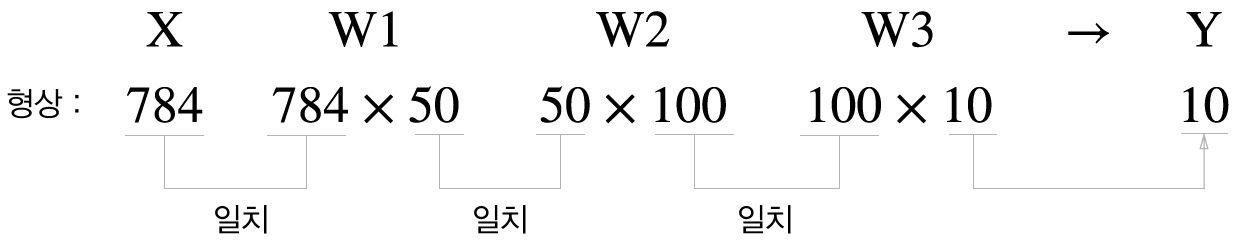

In [24]:
# 그림 3-26 신경망 각 층의 배열 형상의 추이 
# 전체적으로 원소 784개로 구성된 1차원 배열(원래 28 x 28)이 입력되어
# 마지막에는 원소가 10개인 1 차원 배열이 출력되는 흐름 
# 이는 이미지 데이터를 1장만 입력 했을 때의 처리 흐름 
from IPython.display import Image
Image("images/fig 3-26.png")

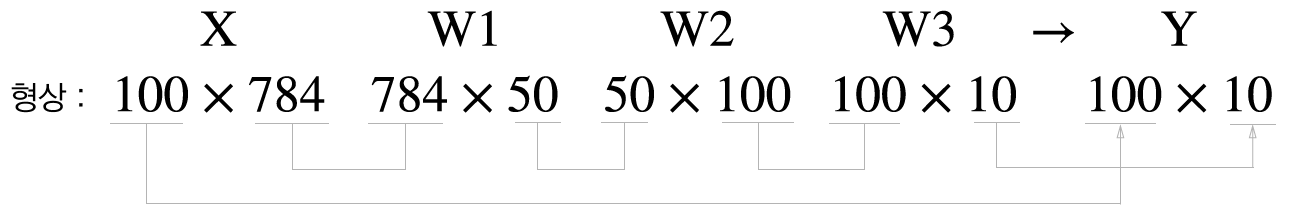

In [26]:
# 배치 처리를 위한 배열들의 형상 추이 
# 입력 데이터의 형상은 100 x 784
# 출력 데이터의 형상은 100 x 10
# 이는 100장 분량 입력 데이터의 결과가 한 번에 출력됨 
# x[0], y[0] : 0번째 이미지와 그 추론 결과 
# x[1], y[1] : 1번째 이미지와 그 추론 결과 
# 이처럼 하나로 묶은 입력 데이터를 배치(batch)라 함( 배치는 묶음)
# 컴퓨터에서는 큰 배열을 한꺼번에 계산하는 것이 분할된 작은 배열을 여러
# 번 계산하는 것보다 빠르다.
Image("images/fig 3-27.png")

In [15]:
# 이제 배치 처리를 구현해 봅시다.
import time
x, t = get_data()
network = init_network()
#print("len(x): " + str(len(x)))

batch_size = 100 # 배치 크기
accuracy_cnt = 0
start_time = time.time()
for i in range(0, len(x), batch_size):
    x_batch = x[i:i+batch_size]
    y_batch = predict(network,x_batch)
    p = np.argmax(y_batch,axis=1)
    accuracy_cnt += np.sum(p == t[i:i+batch_size])
end_time = time.time()        
print("Accuracy: " + str(float(accuracy_cnt) / len(x)))
print("execution time: {} sec ".format(end_time - start_time))    


Accuracy: 0.9352
execution time: 0.12761306762695312 sec 


In [33]:
list(range(0,10))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [34]:
list(range(0,10,3))

[0, 3, 6, 9]

In [35]:
x = np.array([[0.1, 0.8, 0.1],
              [0.3, 0.1, 0.6],
              [0.2, 0.5, 0.3],
              [0.8, 0.1, 0.1]])
y = np.argmax(x,axis=1)

In [36]:
print(y)

[1 2 1 0]


In [37]:
y = np.array([1, 2, 1, 0])
t = np.array([1, 2, 0, 0])
print(y==t)

[ True  True False  True]


In [38]:
np.sum(y==t)

3

# 3.7 정리
* 신경망에서는 매끄럽게 변화하는 시그모이드 함수
* 퍼셉트론에서는 갑자기 변화하는 계단 함수를 활성화 함수 사용

# 이번 장에서 배운 내용
* 신경망에서는 활성화 함수로 시그모이드함수와 ReLU함수 같은 매끄럽게 변화하는 함수 이용
* 넘파이의 다차원 배열을 잘 사용하면 신경망을 효율적으로 구현할 수 있다.
* 기계학습 문제는 크게 회귀와 분류로 나눌 수 있다.
* 출력층의 활성화 함수로는 회귀에서는 주로 항등함수를, 분류에서는 주로 소프트맥수 함수를 이용한다.
* 분류에서는 출력층의 뉴런 수를 분류하려는 클래스 수와 같게 설정한다.
* 입력 데이터를 묶은 것을 배치라 하며, 추론 처리를 이 배치 단위로 진행하면 결과을 휠씬 빠르게 얻을 수 있다.